## Introduction:

After running our NUMERIC variables as a multi-variate test using linear regression model, we found out that the Mean Squared Error was not the best and therefore, in here, we will run the variables as Single-Variate with G3 and find out which of the variables are better in predicting G3.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
sb.set() 

In [2]:
df = pd.read_csv('student-por.csv', sep=';') 

In [3]:
new_df = pd.DataFrame(df[['age','absences','G1','G2','G3']])
new_df.info()
new_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       649 non-null    int64
 1   absences  649 non-null    int64
 2   G1        649 non-null    int64
 3   G2        649 non-null    int64
 4   G3        649 non-null    int64
dtypes: int64(5)
memory usage: 25.5 KB


,age,absences,G1,G2,G3
0,18,4,0,11,11
1,17,2,9,11,11
2,15,6,12,13,12
3,15,0,14,14,14
4,16,0,11,13,13


As it would be tedious to keep on typing the code out to test the linear regression of each variable, functions (train_predict & test_predict) can be used here to fasten the process.

In [4]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression 

def train_predict(X,y):
    lm = LinearRegression()
    lm.fit(X, y)
    predictions = lm.predict(X)
    # Plot our predictions
    plt.figure(figsize=(20,8))
    plt.scatter(predictions, y, s=30, c='r', marker='+')
    plt.xlabel(f"Predicted G3")
    plt.ylabel("Actual G3")
    
    mse = mean_squared_error(y, predictions)
    r2 = lm.score(X_train, y_train)
    
    print("MSE(train):", mse)
    print("R-squared(train):", r2)
    
    return lm.coef_,lm.intercept_

def test_predict(X,y):
    lm = LinearRegression()
    lm.fit(X, y)
    predictions = lm.predict(X)
    # Plot our predictions
    plt.figure(figsize=(20,8))
    plt.scatter(predictions, y, s=30, c='b', marker='*')
    plt.xlabel(f"Predicted G3")
    plt.ylabel("Actual G3")
    
    mse = mean_squared_error(y, predictions)
    r2 = lm.score(X_train, y_train)
    
    print("MSE(test):", mse)
    print("R-squared(test):", r2)
    
    return 

MSE(train): 10.573347061569088
R-squared(train): 0.01224741113392136
MSE(test): 9.167635776700525
R-squared(test): -0.02863569987853576


Text(0.5, 1.0, 'age')

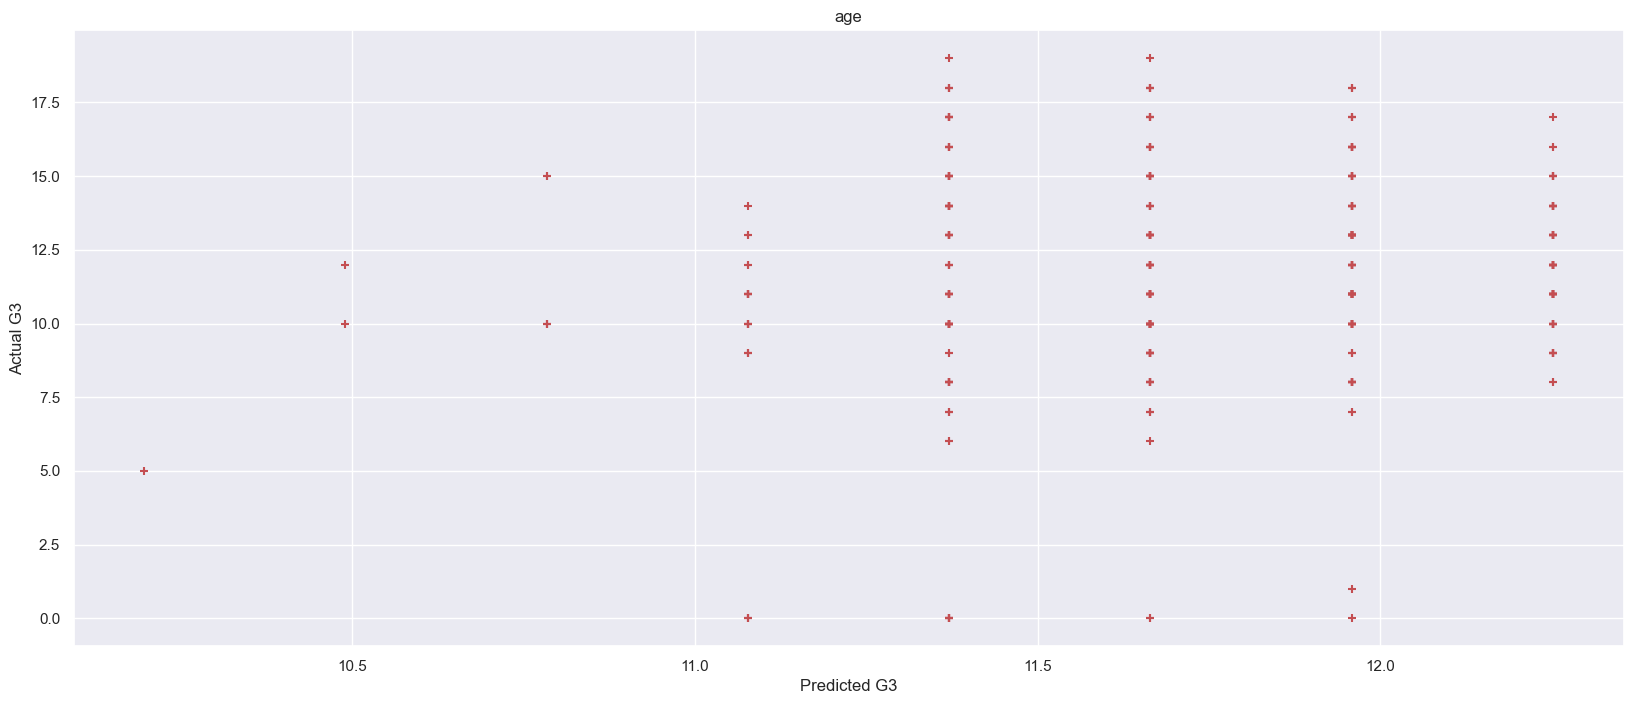

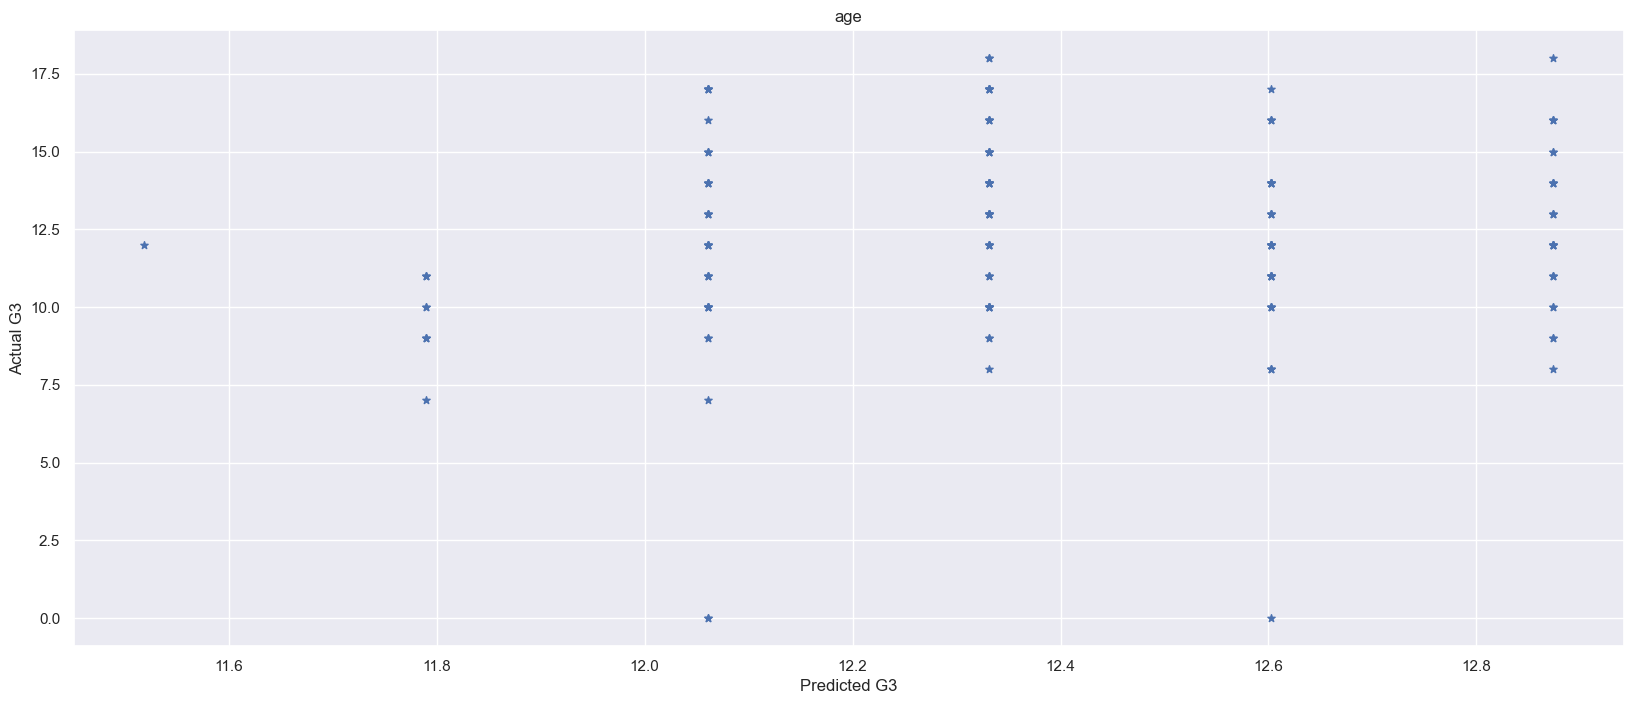

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = df['G3']
X = new_df[['age']]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25)
train_predict(X_train,y_train)
plt.title("age")
test_predict(X_test,y_test)
plt.title("age")

MSE(train): 9.991217165800892
R-squared(train): 0.01273899163401837
MSE(test): 11.286516530937327
R-squared(test): 0.004683574591109241


Text(0.5, 1.0, 'absences')

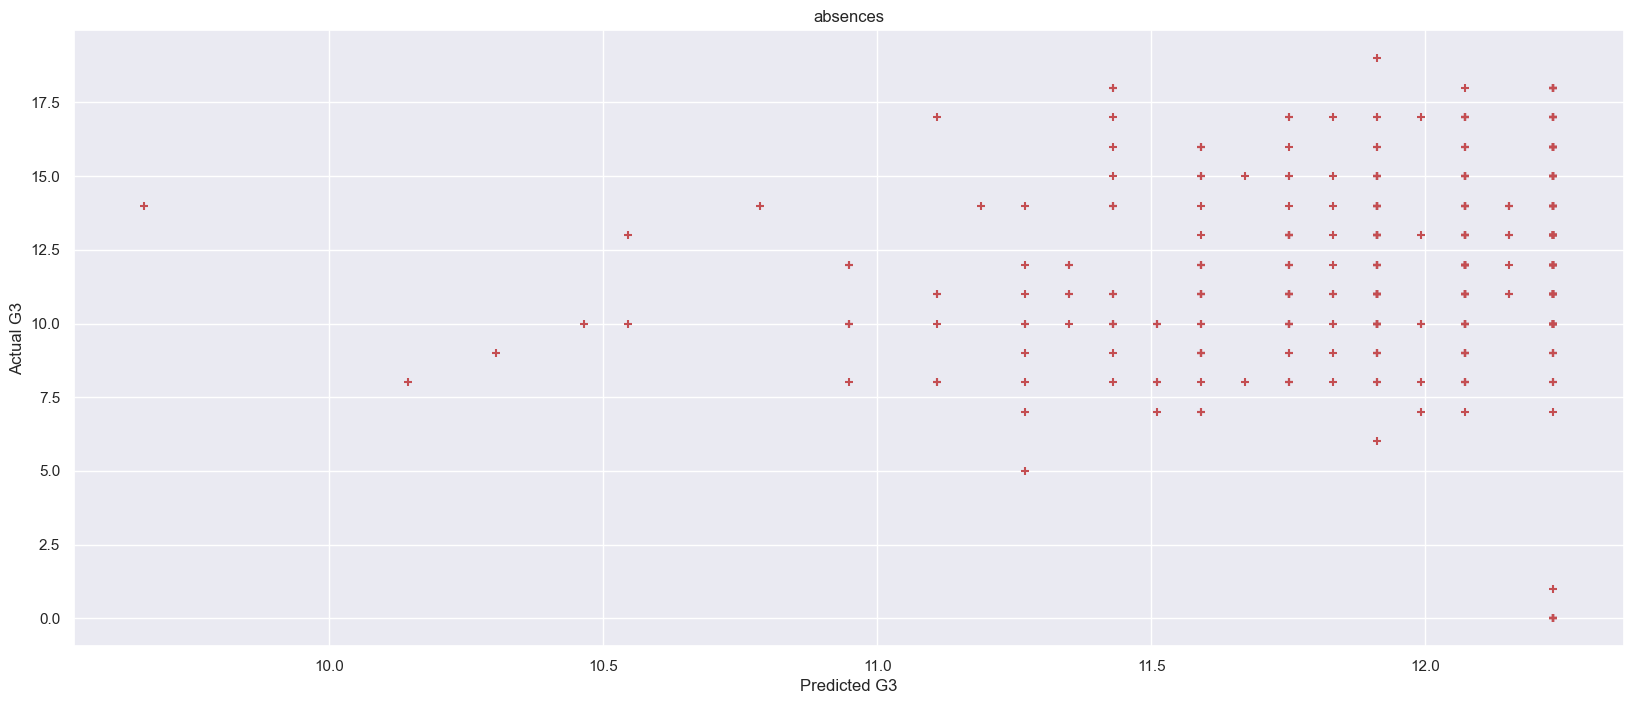

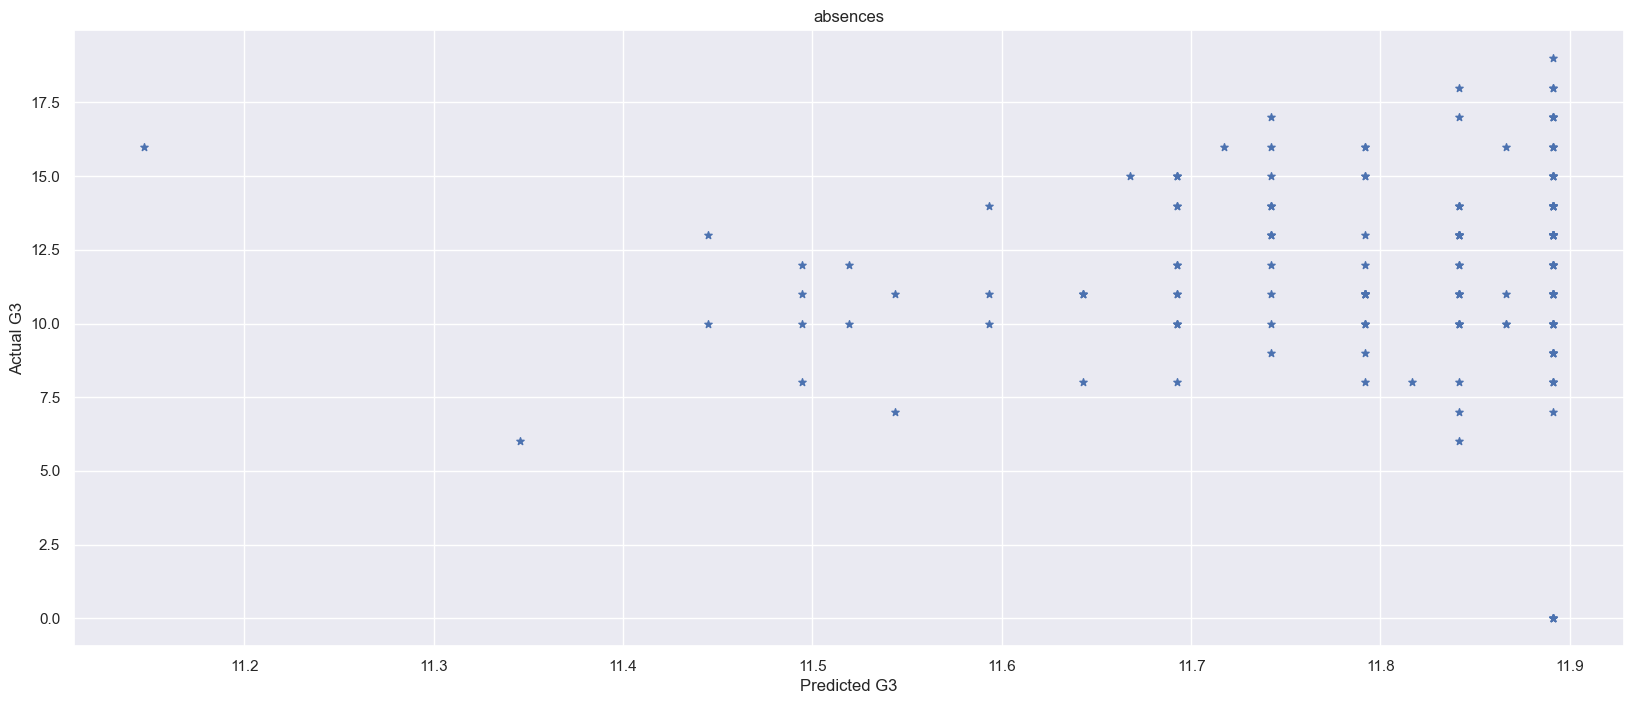

In [6]:
y = df['G3']
X = new_df[['absences']]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25)
train_predict(X_train,y_train)
plt.title("absences")
test_predict(X_test,y_test)
plt.title("absences")

MSE(train): 3.233387601189883
R-squared(train): 0.6910645214351293
MSE(test): 3.5113399670185923
R-squared(test): 0.6904135480876727


Text(0.5, 1.0, 'G1')

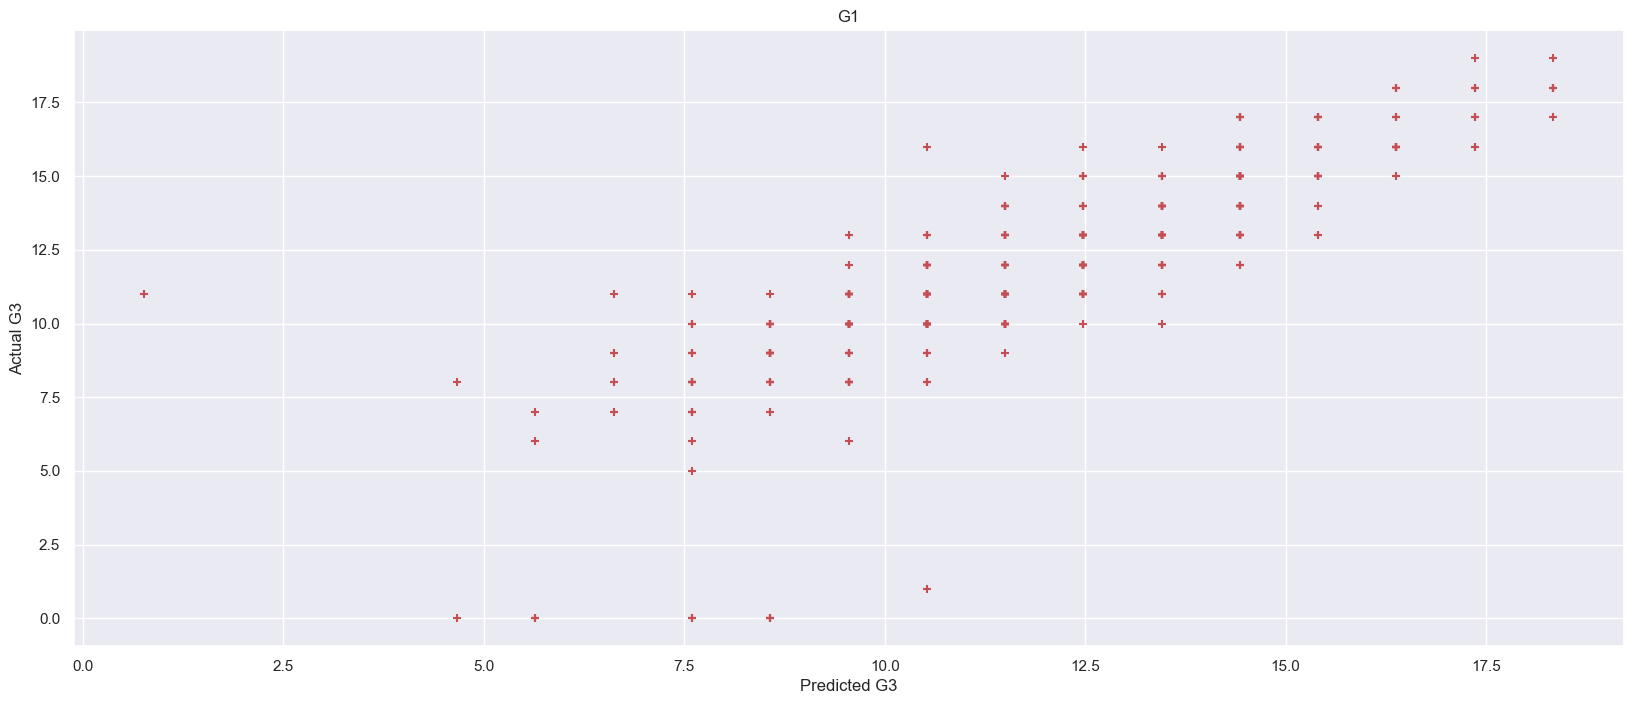

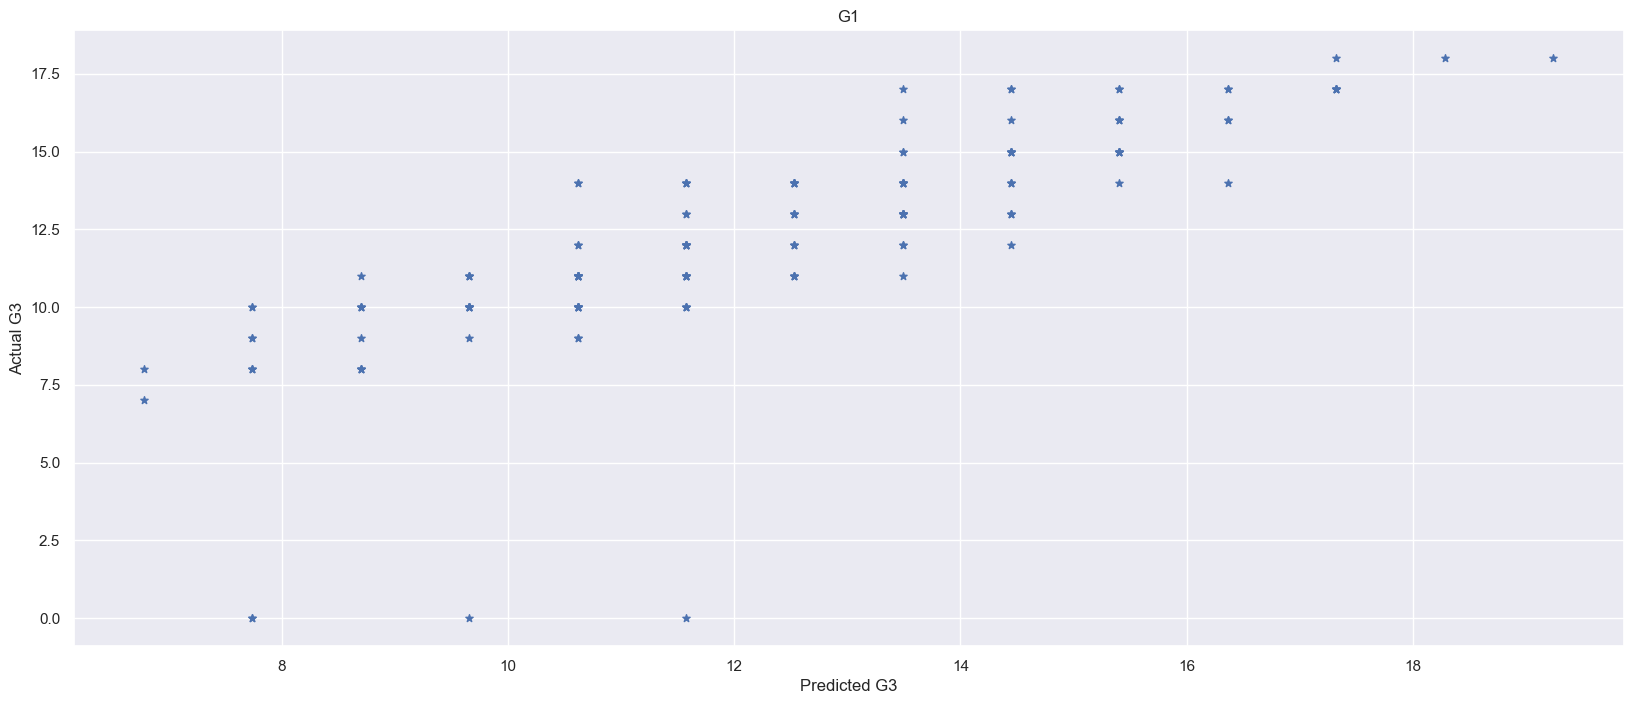

In [7]:
y = df['G3']
X = new_df[['G1']]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25)
train_predict(X_train,y_train)
plt.title("G1")
test_predict(X_test,y_test)
plt.title("G1")

MSE(train): 1.501946066006123
R-squared(train): 0.847825219356183
MSE(test): 1.9873237110193824
R-squared(test): 0.8452546427360643


Text(0.5, 1.0, 'G2')

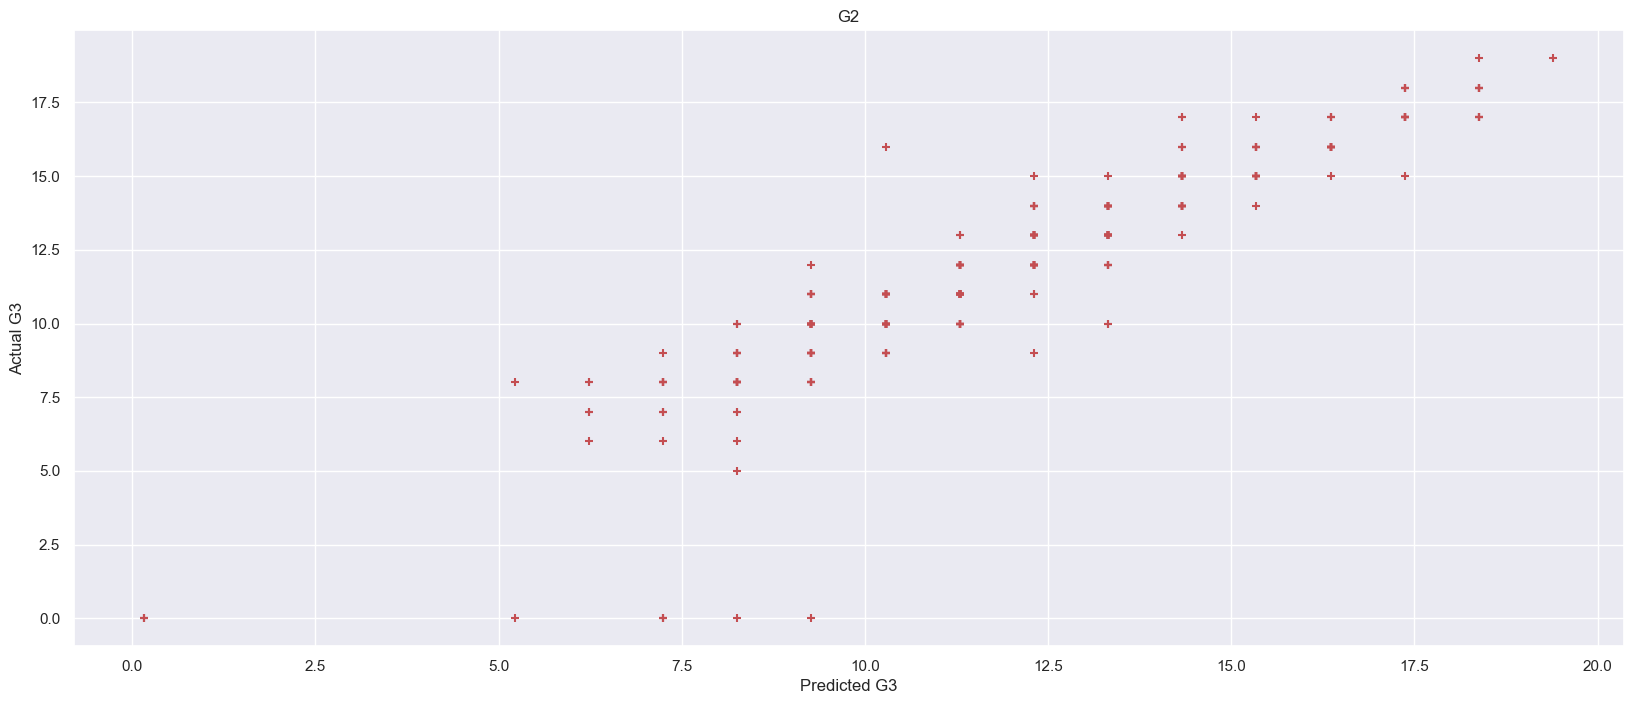

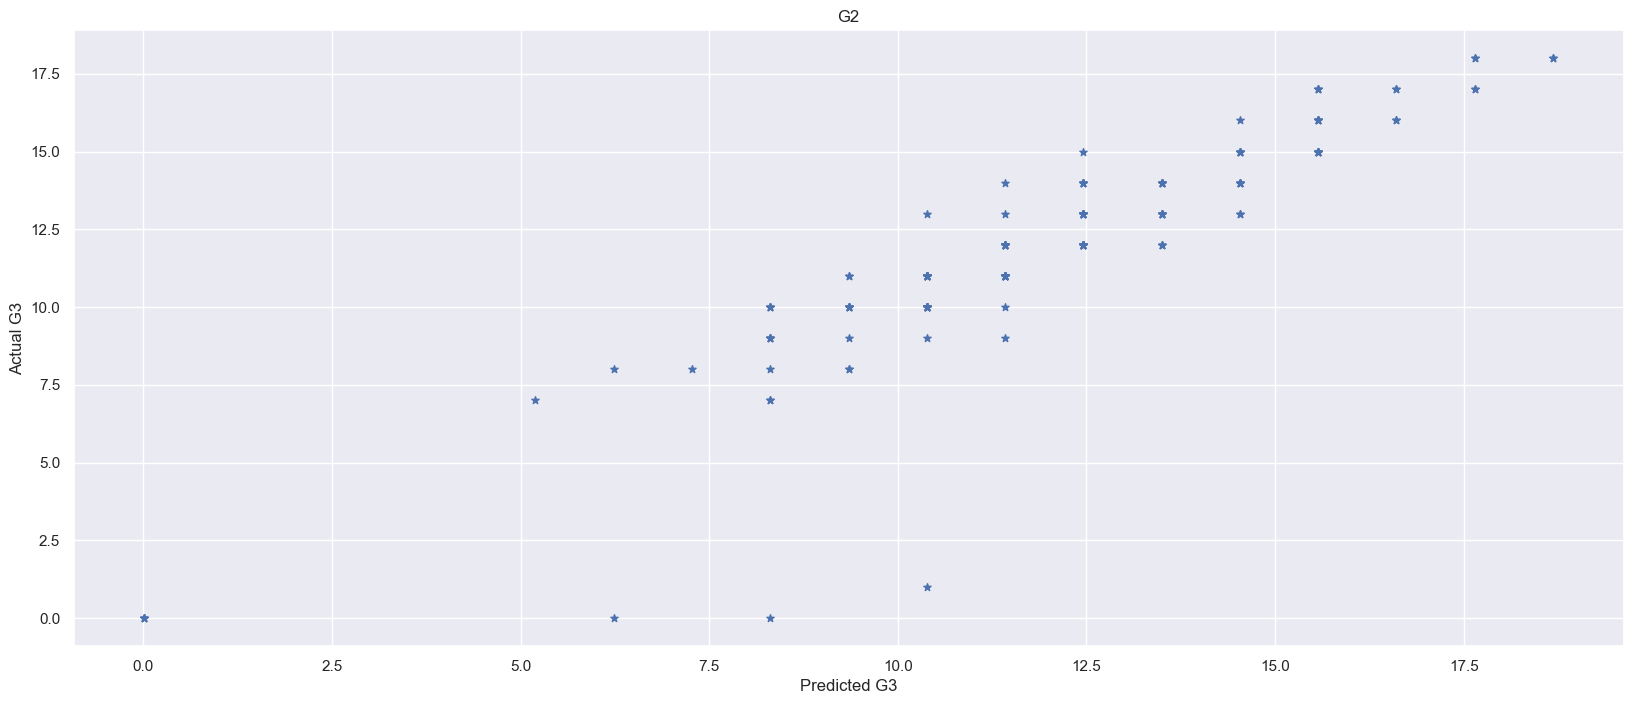

In [8]:
y = df['G3']
X = new_df[['G2']]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25)
train_predict(X_train,y_train)
plt.title("G2")
test_predict(X_test,y_test)
plt.title("G2")

### Conclusion:

By looking at the R^2 and MSE of each variable, G2 would be the best variable, followed by G1, absences and age in that order. 

For the other variables:'traveltime', 'studytime', 'failures', we will use a boxplot to see how well they are related to 'G3' as they are categorised from 1 to 4.